In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
import warnings

sns.set_style("darkgrid")

warnings.filterwarnings("ignore")

plt.rcParams.update({'font.size': 15})

### Flow 

* Descriptive Statistic
* Text Data Cleaning  
* Affin sentiment or Rating conversion to Positive Negative Neutral
* Visualization - Word Cloud // Term Frequency -> to understand the attribute
* Handling imbalance Data set -> SMOTEN
* Split into Train and Test 
* Word2Vec / CountVectorizer / TFIDF -> Vectors -> Save Training and Testing Data Set
* PCA and TSNE
* Model Building

### Descriptive Statistics

In [5]:
# Custom Function to diivde the rating into two class problem (howevere it is is primitive technique)
def map_sentiment(rating):
    if rating <= 2:
        return 0
    else:
        return 1

In [2]:
df = pd.read_csv('Tripadvisor_Grand_Hyatt_Review.csv')

# Droping duplicate index column
df = df.iloc[:, 1:]

# concatination of Review title + Review, +str(' ') to add space in between the both
df['Review_Combined'] = df['Review_Title'] + str(' ') + df['Review']

# sentiment maped into 2 class 1=Positive reviews 0=Negtaive reviews
df['Sentiment'] = [map_sentiment(x) for x in df['Rating']]
df.head()

NameError: name 'pd' is not defined

In [335]:
# Record of Review + Review title combined column
df['Review_Combined'][0]

"Unforgettable experience..amazing staycation ever!!! We visited Grand Hyatt on the occasion of my sister's birthday. Right from the moment we entered the hotel, the staff made sure that the occasion is getting well celebrated. The reception team sent an amazing cake with a beautiful birthday card in the room. Later in the club, we had so much fun, there were drinks and food, everything was top notch. The entire hotel and club team is very friendly and efficient. Special appreciation to Zaki and Carolyn from the front reception team, they made sure that our overall stay is comfortable. Also want to appreciate Ashish and his team from the club as they made that evening memorable for us. Also want to appreciate Agnel and the staff from fifty five east restaurant, they made a lovely dish for my sister to make her birthday even more…"

In [336]:
# no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer_name    5000 non-null   object
 1   Rating           5000 non-null   int64 
 2   Review_Title     5000 non-null   object
 3   Review           5000 non-null   object
 4   Review_Combined  5000 non-null   object
 5   Sentiment        5000 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 234.5+ KB


In [337]:
# No Duplicate values
df.duplicated().value_counts()

False    5000
dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='count'>

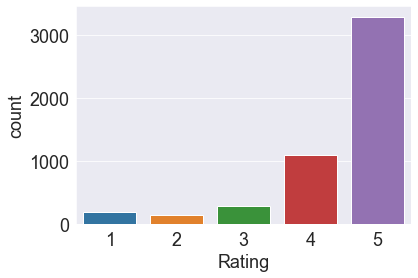

In [339]:
# Most of the rating are in 4 and 5 
sns.countplot(df['Rating'])

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

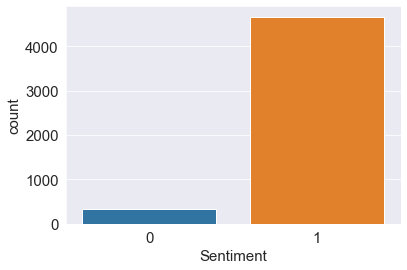

In [348]:
# 1 = Positive 0 = Negative
sns.countplot(df['Sentiment'])

### Text Data Cleaning

In [349]:
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy

#Lemmatization
wordnet=WordNetLemmatizer()

#Stop word
stop_words=stopwords.words('english')

nlp=spacy.load('en_core_web_sm')

In [350]:
# Varibale created for words which are not included in the stopwords
not_stopwords = ("aren", "aren't", "couldn", "couldn't", "didn", "didn't",
                 "doesn", "doesn't", "don", "don't", "hadn", "hadn't", "hasn",
                 "hasn't", "haven", "haven't", "isn", "isn't", "mustn",
                 "mustn't", "no", "not", "only", "shouldn", "shouldn't",
                 "should've", "wasn", "wasn't", "weren", "weren't", "will",
                 "wouldn", "wouldn't", "won't", "very")
stop_words_ = [words for words in stop_words if words not in not_stopwords]

# Additional words added in the stop word list
stop_words_.append("I")
stop_words_.append("the")
stop_words_.append("s")
print(stop_words_)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'own', 'same', 'so', 'than', 'too', 's', 't', 'can'

In [351]:
corpus = []
for i in range(0, len(df)):
    # Removal of puntuations
    review = re.sub('[^a-zA-Z]', ' ', df['Review_Combined'][i])

    # Converting Text to Lower case
    review = review.lower()

    # Spliting each words - eg ['I','was','happy']
    review = review.split()

    # Applying Lemmitization for the words eg: Argument -> Argue - Using Spacy Library
    review = nlp(' '.join(review))
    review = [token.lemma_ for token in review]

    # Removal of stop words
    review = [word for word in review if word not in stop_words_]

    # Joining the words in sentences
    review = ' '.join(review)
    corpus.append(review)

In [352]:
pd.DataFrame(corpus).head()

0
0  unforgettable experience amazing staycation ev...
1  love grand hyatt hotel everything fabulous ver...
2  knowledgeable trainer fascinate diet exercise ...
3  night stay grand hyatt mumbai absolutely love ...
4  staycation book grand hyatt santacruz staycati...

In [353]:
# cleaned review added to the data frame
df['Cleaned_Review'] = corpus

In [355]:
# Finding total words in cleaned review
clean_review_words = " ".join(df['Cleaned_Review'])
clean_review_words = clean_review_words.split()

# total number of words present in cleaned reviews
len(clean_review_words)

220542

<AxesSubplot:xlabel='Word_count_clean_review', ylabel='Count'>

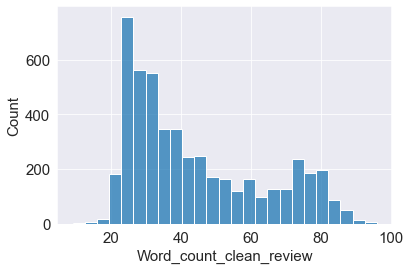

In [356]:
# Number of words in the cleaned Review
df['Word_count_clean_review'] = pd.Series(
    [len(item.split()) for item in df['Cleaned_Review']])

# most of the cleaned review have 20to 40 words
sns.histplot(df['Word_count_clean_review'])

In [357]:
# finding frequency of all words
all_words = len(clean_review_words)
print('Total words in clean review is {}'.format(all_words))

word_dist = nltk.FreqDist(clean_review_words)

# Creating dataframe for word frequency
freq_data_all = pd.DataFrame(word_dist.most_common(all_words),
                             columns=['Word', 'Frequency'])

# Percentage of word frequency
freq_data_all['percentFreq_all'] = (freq_data_all.Frequency /
                                    freq_data_all.Frequency.sum()) * 100

print('No of unique words {}'.format(len(freq_data_all)))
print(freq_data_all[0:10])

Total words in clean review is 220542
No of unique words 9995
      Word  Frequency  percentFreq_all
0    hotel       5883         2.667519
1     stay       4510         2.044962
2     good       4487         2.034533
3     very       4178         1.894424
4     room       4090         1.854522
5    staff       3268         1.481804
6    hyatt       3017         1.367993
7  service       2909         1.319023
8    grand       2660         1.206119
9    great       2588         1.173473


In [358]:
(freq_data_all['Frequency']==1).value_counts() 

False    5349
True     4646
Name: Frequency, dtype: int64

### Affin Sentiment 

In [359]:
from afinn import Afinn
from collections import Counter

In [360]:
afn=Afinn()

In [361]:
# Affin Sentiment Score
score = [afn.score(item) for item in df['Cleaned_Review']]

# Positive review = 1
# Negative review = 0

# Affin Sentiment Making it a two class classification problem
Affin_sentiment = [1 if score > 0 else 0 for score in score]

In [362]:
# Affin Sentiment & Score added to the data frame
df['Affin_score'] = score
df['Affin_sentiment'] = Affin_sentiment

In [363]:
# viewing only the negative reviews
df[df['Affin_sentiment'] == 0]['Cleaned_Review']

59      bad food way serve quality food pathetic don e...
78      stay july extremely poor service not ethic hou...
80      very poor service commitment very bad service ...
89      incompetent ruthless front desk ms arti n ms n...
92      great lobby poor room poor food stay hotel cel...
106     check take hour pay prior come hotel expect ch...
110     bad check experience life wait hour check staf...
122     bad service first visit hyatt property terribl...
124     service not expect very unorganised come kind ...
138     unsatisfactory stay mention early very much di...
167     hour check room wait around hour get room allo...
174     bad experience very bad experience food experi...
190     mosquito room could not sleep duke mosquito ro...
297     extremely disappointed stay extremely disappoi...
300     bad staff experience ever hi always regular hy...
316     not per expectation room good no one resolve q...
386     not great experience lot issue parking checkin...
388     poor s

In [364]:
df.head()

Customer_name  Rating                                       Review_Title  \
0  maneshpreet26       5  Unforgettable experience..amazing staycation e...   
1   Majnu gosavi       5           All about in love with grand Hyatt hotel   
2  Akash Bhosale       5                         Most Knowledgeable Trainer   
3    Mahek Dugar       5                 A night stay at Grand Hyatt Mumbai   
4         Jaslin       4                                         Staycation   

                                              Review  \
0  We visited Grand Hyatt on the occasion of my s...   
1  तुम्हारी क्या तारीफ करू  तुम्ह ही तो तारीफ हो ...   
2  I was fascinated by the Diet and Exercise know...   
3  absolutely loved the stay. amazing food, ambie...   
4  I had booked Grand Hyatt Santacruz for Staycat...   

                                     Review_Combined  Sentiment  \
0  Unforgettable experience..amazing staycation e...          1   
1  All about in love with grand Hyatt hotel तुम्ह...          1   
2  Most Knowledgeable Trainer I was fascinated by...          1   
3  A night stay at Grand Hyatt Mumbai absolutely ...          1   
4  Staycation I had booked Grand Hyatt Santacruz ...          1   

   Review_length                                     Cleaned_Review  \
0            787  unforgettable experience amazing staycation ev...   
1            390  love grand hyatt hotel everything fabulous ver...   
2            245  knowledgeable trainer fascinate diet exercise ...   
3            282  night stay grand hyatt mumbai absolutely love ...   
4            278  staycation book grand hyatt santacruz staycati...   

   Clean_Data_length  Word_count_clean_review  Affin_score  Affin_sentiment  
0                579                       84         39.0                1  
1                292                       43         23.0                1  
2                199                       26         14.0                1  
3                230                       33         25.0                1  
4                201                       30          9.0                1

<AxesSubplot:xlabel='Affin_score', ylabel='Density'>

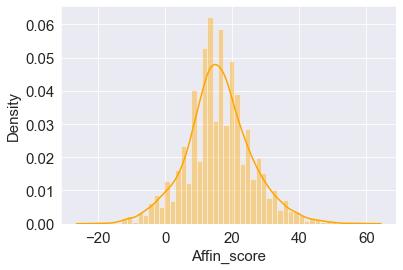

In [365]:
# Affin score visualization
sns.distplot(df['Affin_score'], color='orange')

Class: 1, Number: 4709, Percentage 94.18
Class: 0, Number: 291, Percentage 5.82


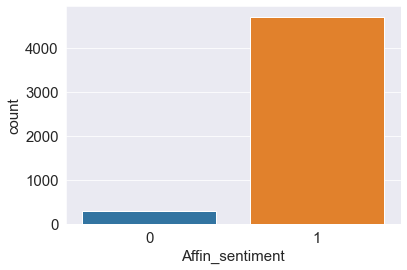

In [366]:
sns.countplot(df['Affin_sentiment'])
counter = Counter(df['Affin_sentiment'])
counter.items()

# Percentage of Data as per Affin Sentiment, Huge diffrence in the two classes..!!
for k, v in counter.items():
    per = v / 5000 * 100
    print("Class: {}, Number: {}, Percentage {}".format(
        k, v, np.round(per, 2)))

### Visualization

#### Word cloud for Entire Reviews 

In [367]:
from wordcloud import WordCloud

In [368]:
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='Black',
    colormap='Set2',
    stopwords=stop_words_,
    max_words=100,
    random_state=42,
).generate(str(corpus))

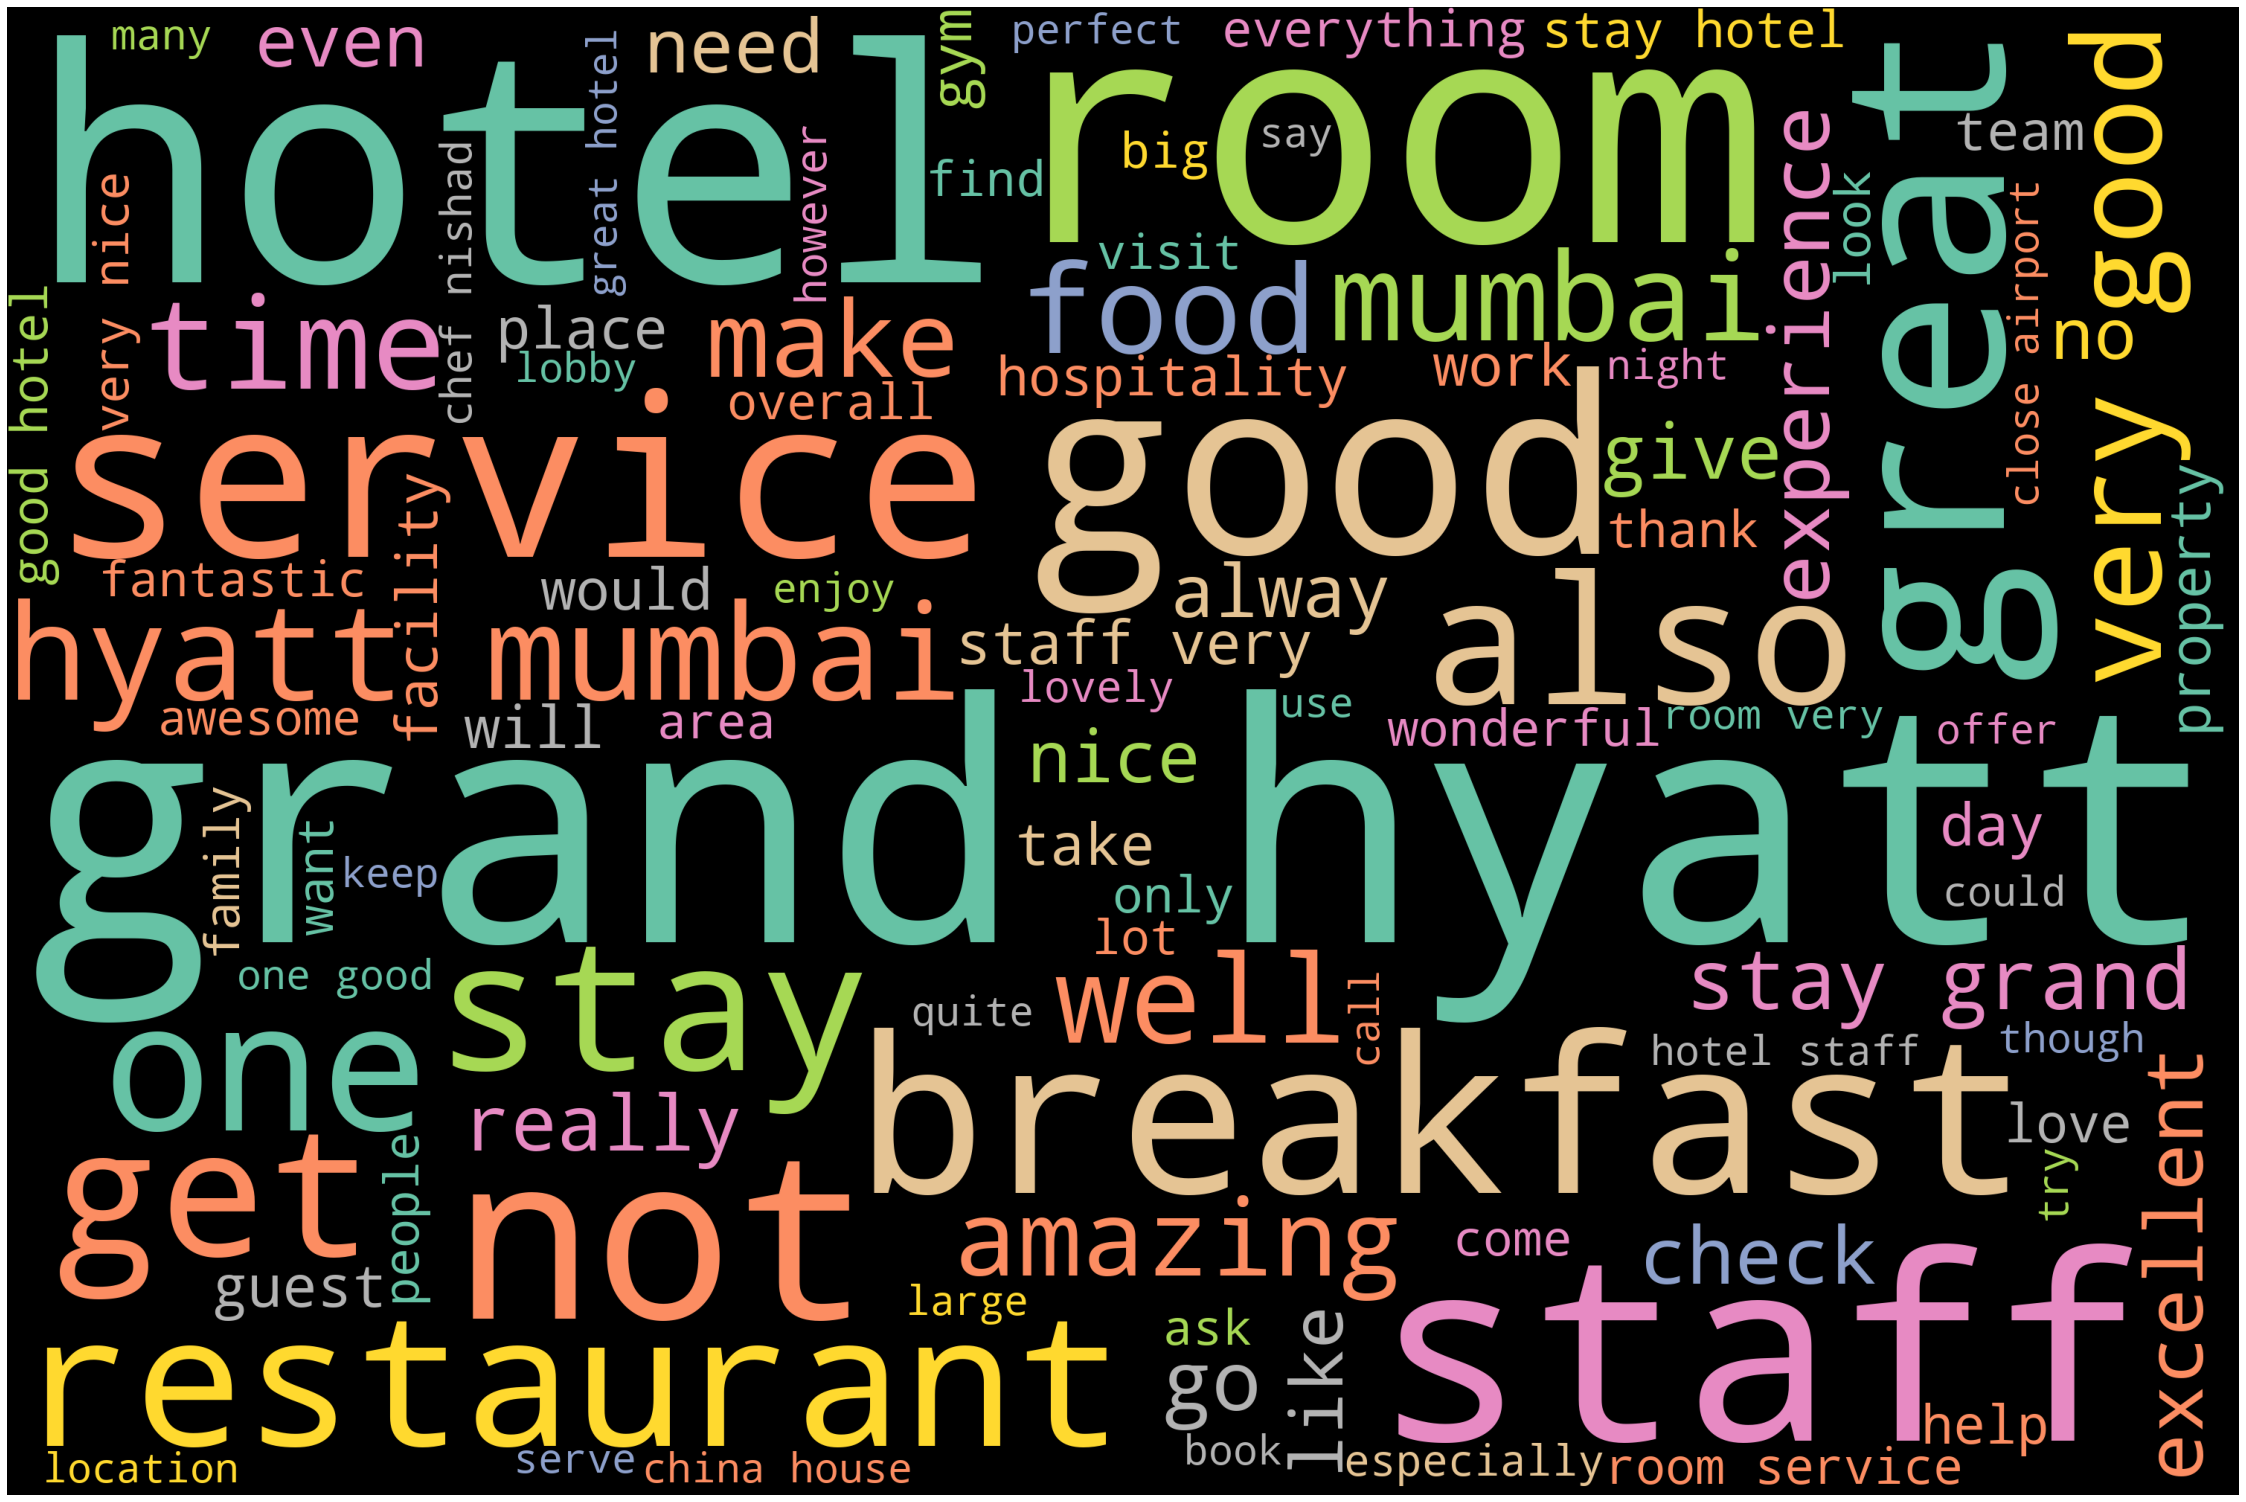

In [369]:
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Word Cloud for Positive Reviews 

In [370]:
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='Black',
    colormap='Set2',
    stopwords=stop_words_,
    max_words=100,
    random_state=42,
).generate(str(df[df['Affin_sentiment'] == 1]['Cleaned_Review']))

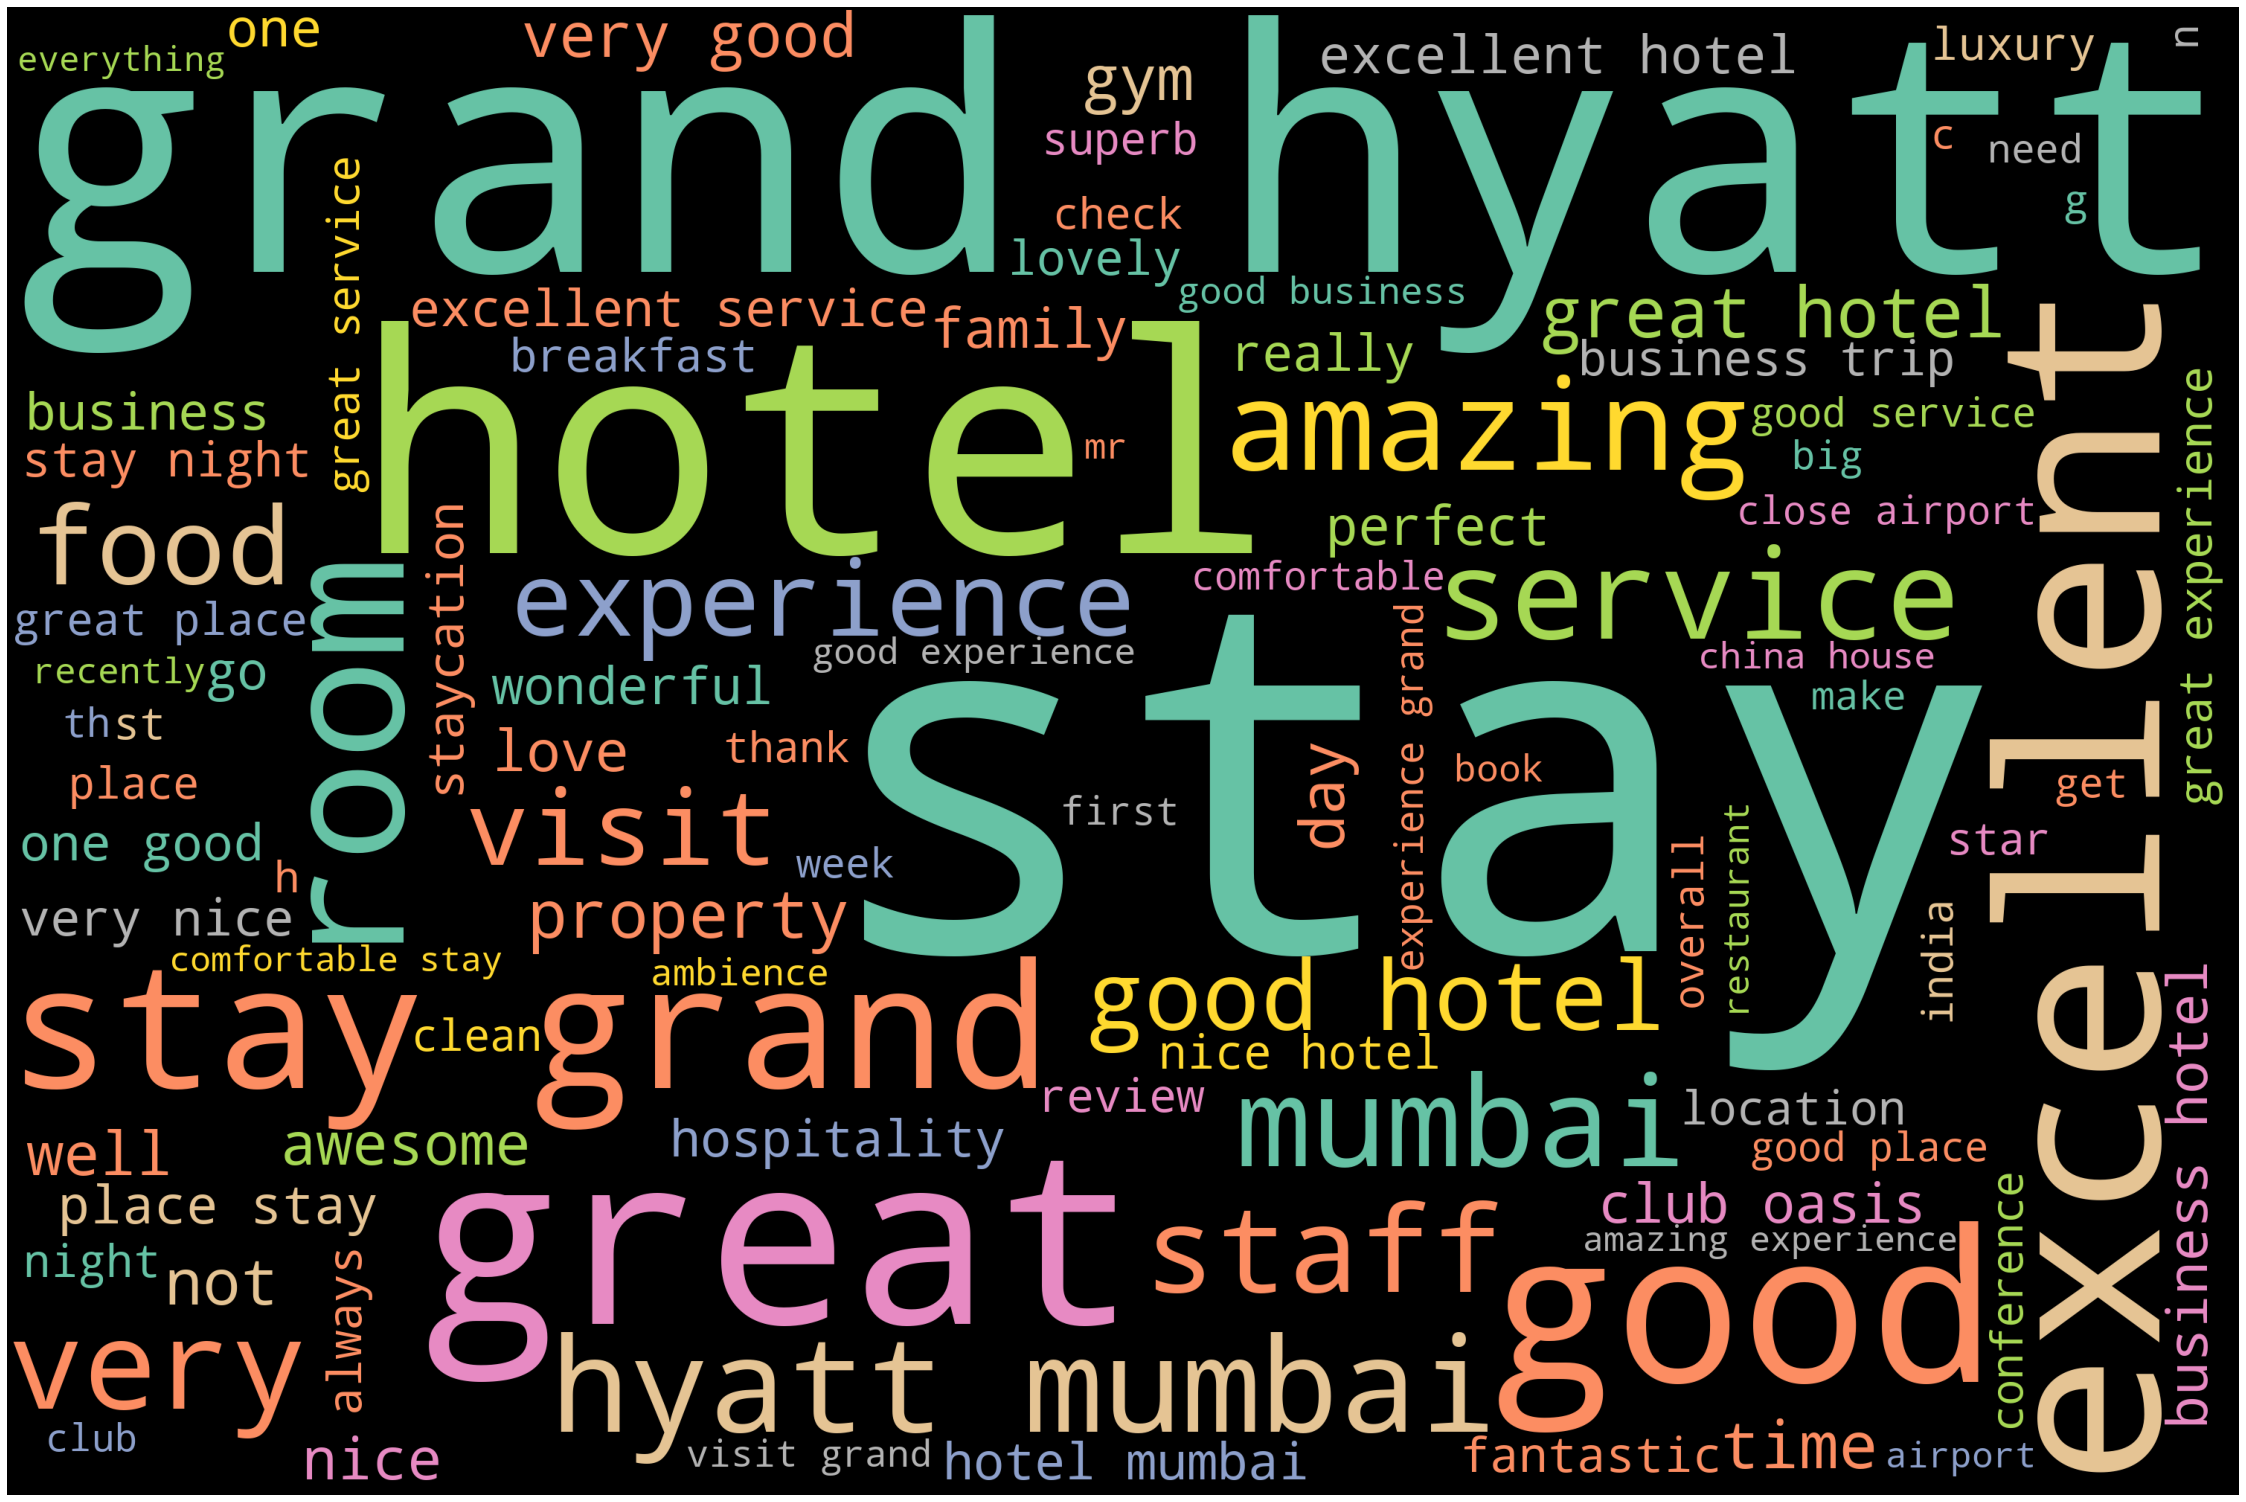

In [371]:
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Word Cloud for Negative Reviews

In [372]:
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='Black',
    colormap='Set2',
    stopwords=stop_words_,
    max_words=100,
    random_state=42,
).generate(str(df[df['Affin_sentiment'] == 0]['Cleaned_Review']))

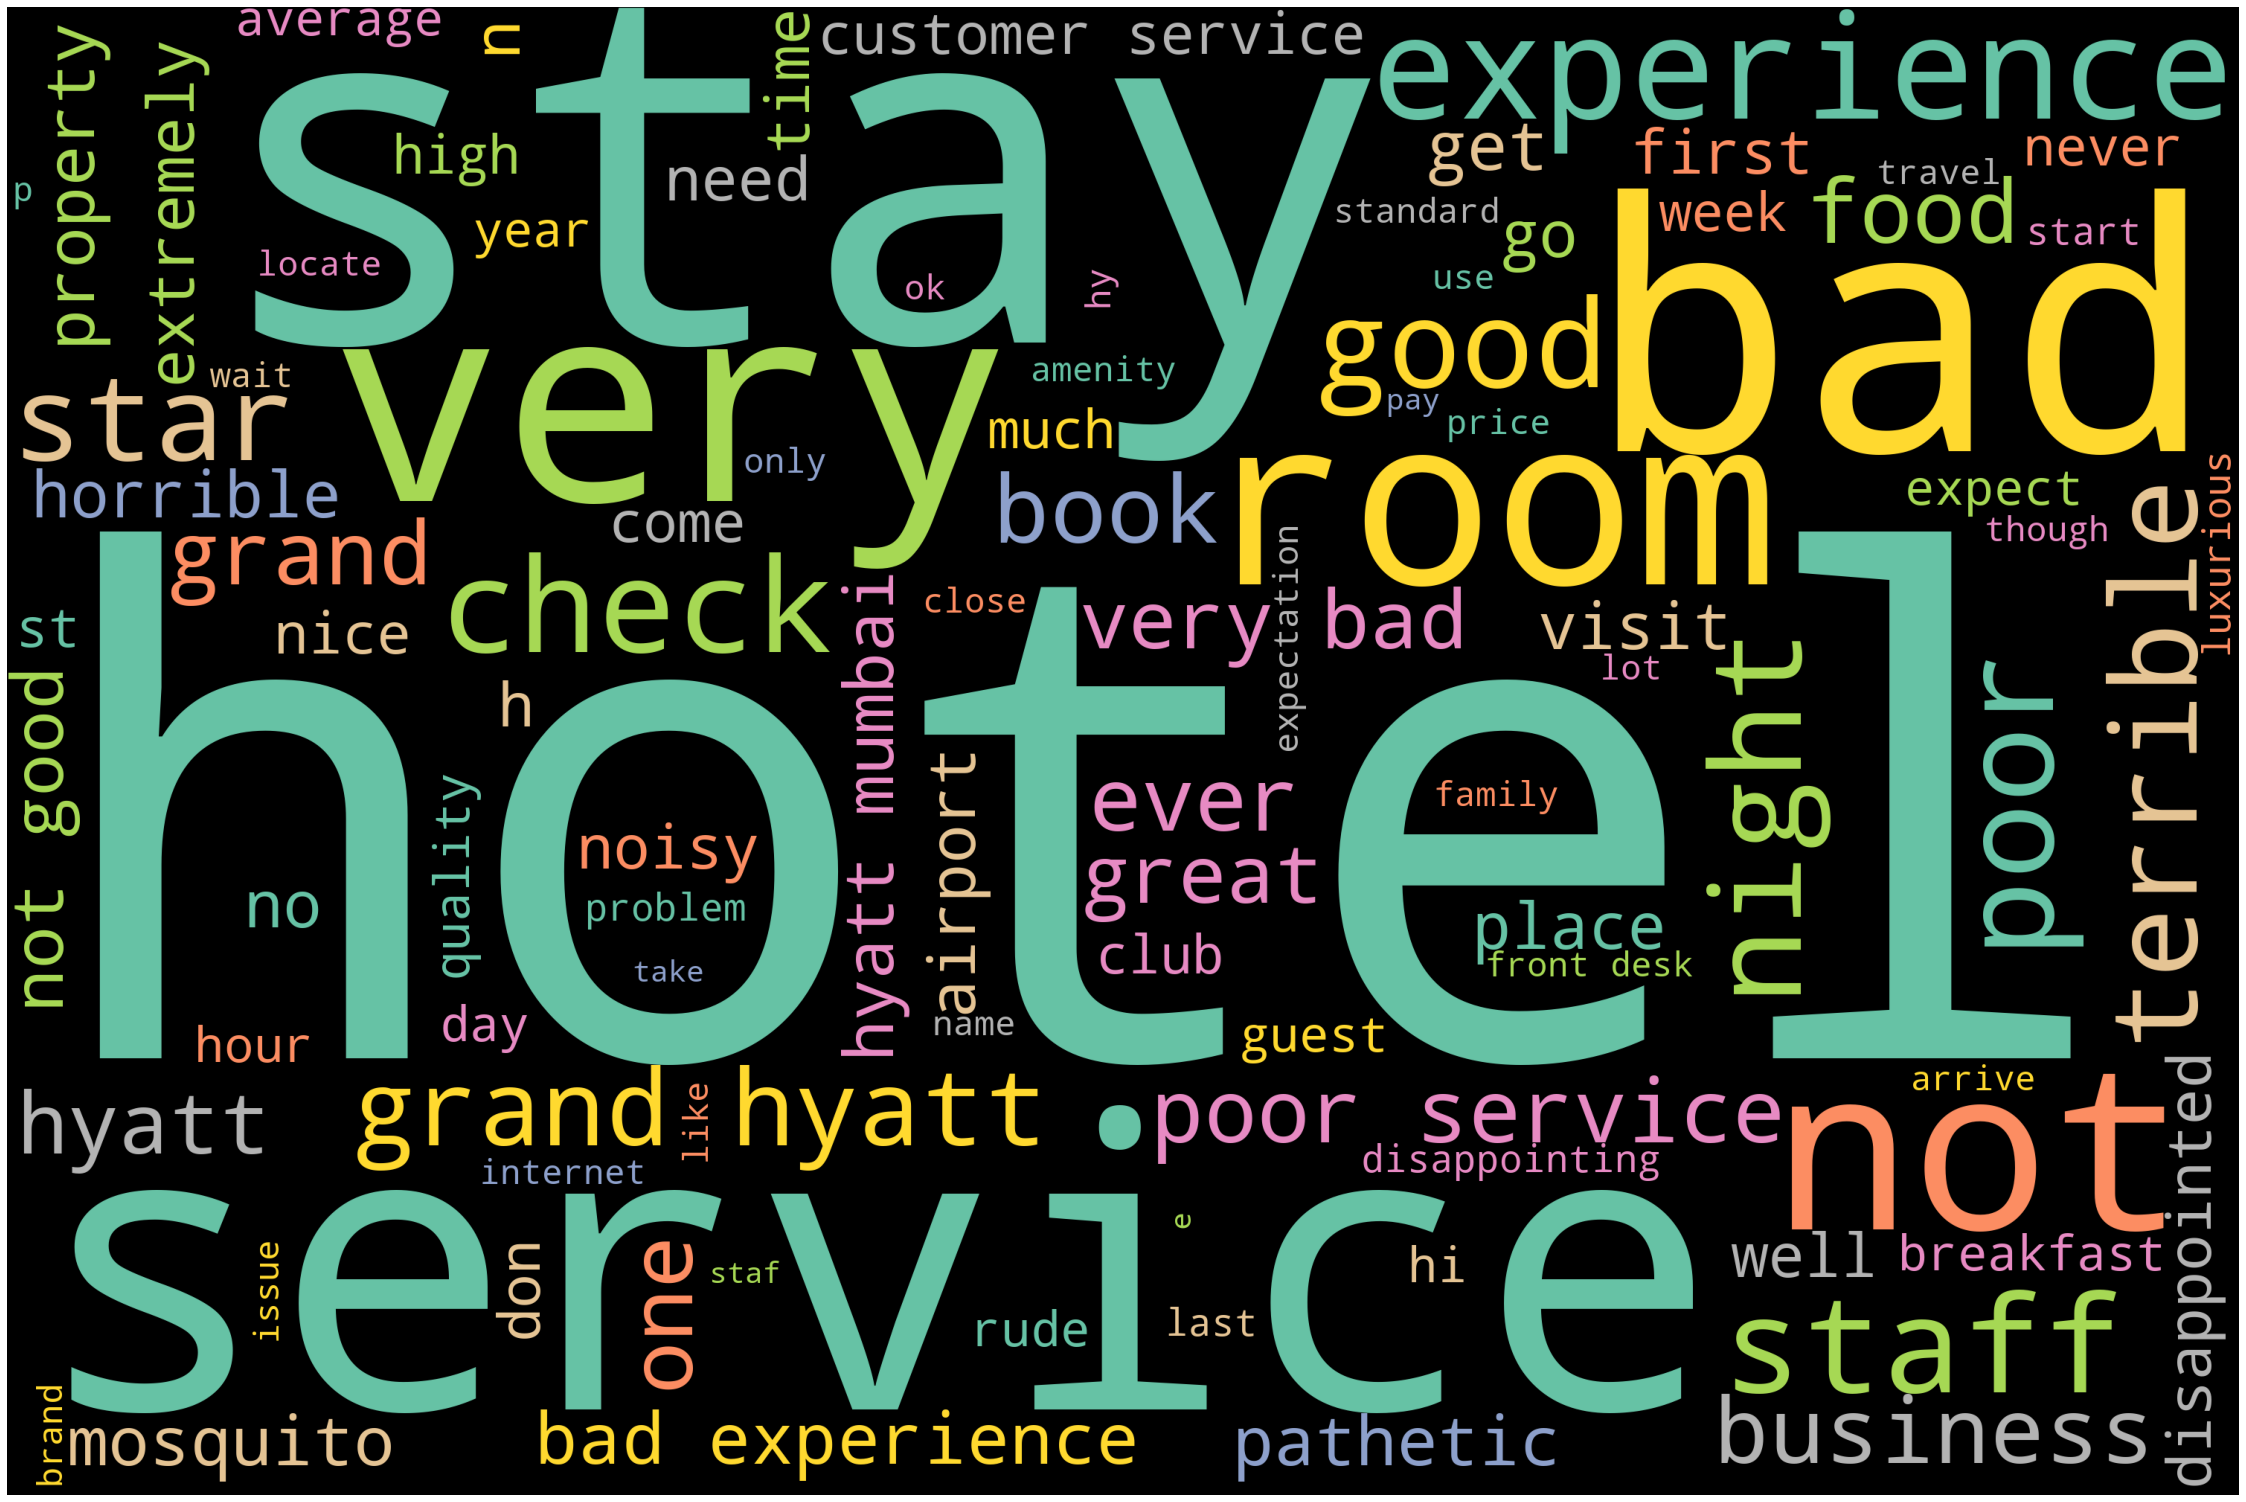

In [373]:
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Term Frequency with Count Vetorizer

In [374]:
# Stop word
stop_words_keywords = stopwords.words('english')

# special additioanl stop words added for keyword extraction
stop_words_keywords.extend([
    "will", "always", "go", "one", "very", "good", "only", "mr", "lot", "two",
    "th", "etc", "don", "due", "didn", "since", "nt", "ms", "ok", "almost",
    "put", "pm", "hyatt", "grand", "till", "add", "let", "hotel", "able",
    "per", "st", "couldn", "yet", "par", "hi", "well", "would", "I", "the",
    "s", "also", "great", "get", "like", "take", "thank"
])

In [375]:
# find the most frequent words in the data, extracting information about its content and topics.

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

stops = set(stopwords.words('english') + ['com'])
co = CountVectorizer(stop_words=stop_words_keywords)
counts = co.fit_transform(corpus)
most_freq_terms = pd.DataFrame(counts.sum(axis=0),
                               columns=co.get_feature_names()).T.sort_values(
                                   0, ascending=False).head(25)

<AxesSubplot:title={'center':'Unigram Frequency'}>

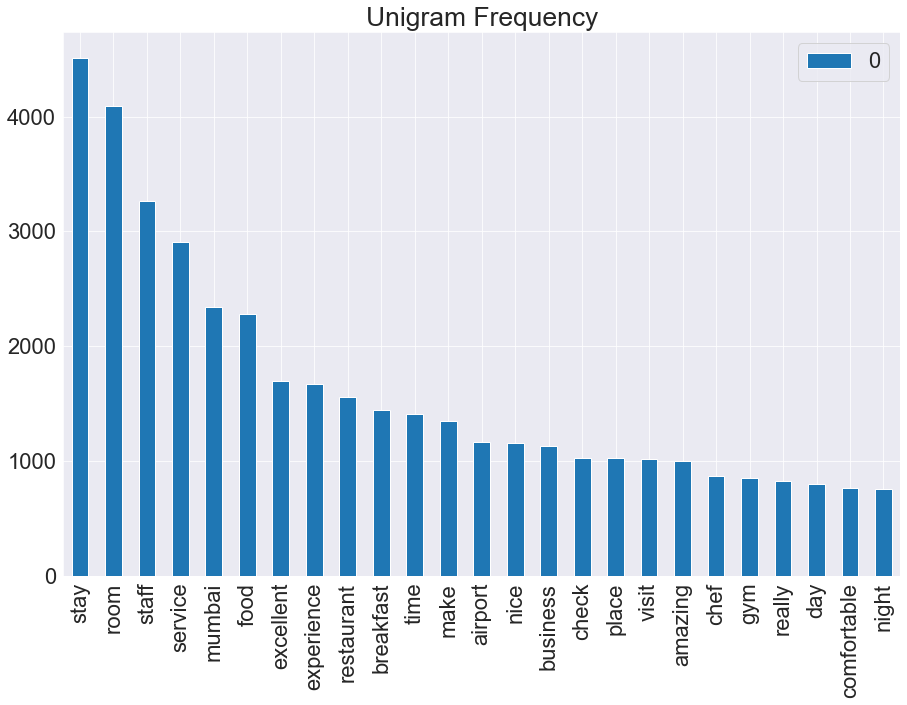

In [376]:
most_freq_terms.plot(kind='bar', title='Unigram Frequency', figsize=(15, 10))

In [377]:
# Now we can check for frequent bi-grams:
co = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words_keywords)
counts1 = co.fit_transform(corpus)
bi_grams = pd.DataFrame(counts1.sum(axis=0),
                        columns=co.get_feature_names()).T.sort_values(
                            0, ascending=False).head(25)

<AxesSubplot:title={'center':'bi-grams'}>

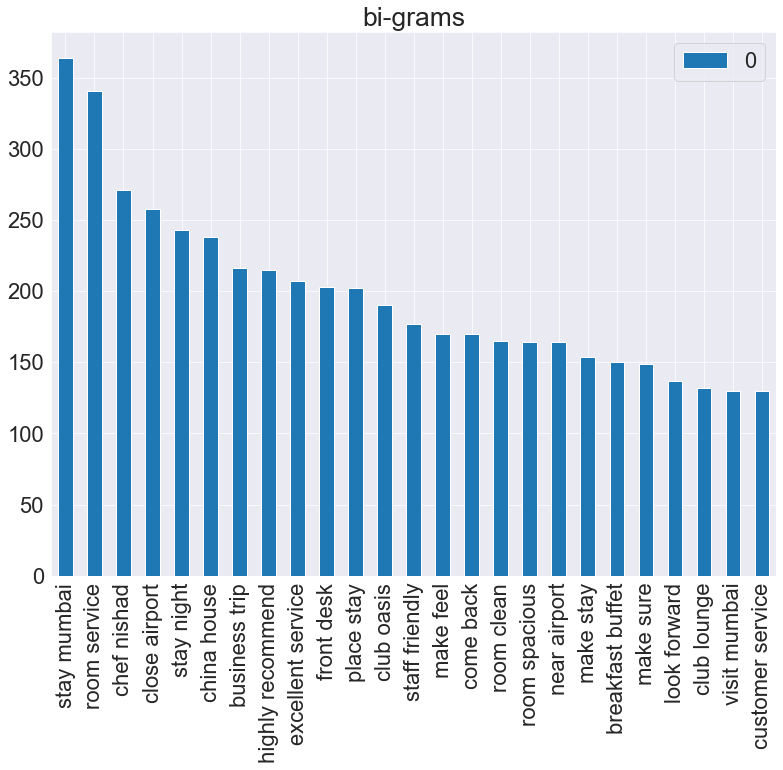

In [378]:
bi_grams.plot(kind='bar', title='bi-grams', figsize=(13, 10))

In [379]:
# Now we can check for frequent tri-grams:
co = CountVectorizer(ngram_range=(3, 3), stop_words=stop_words_keywords)
counts1 = co.fit_transform(corpus)
tri_grams = pd.DataFrame(counts1.sum(axis=0),
                         columns=co.get_feature_names()).T.sort_values(
                             0, ascending=False).head(25)

<AxesSubplot:title={'center':'tri-grams'}>

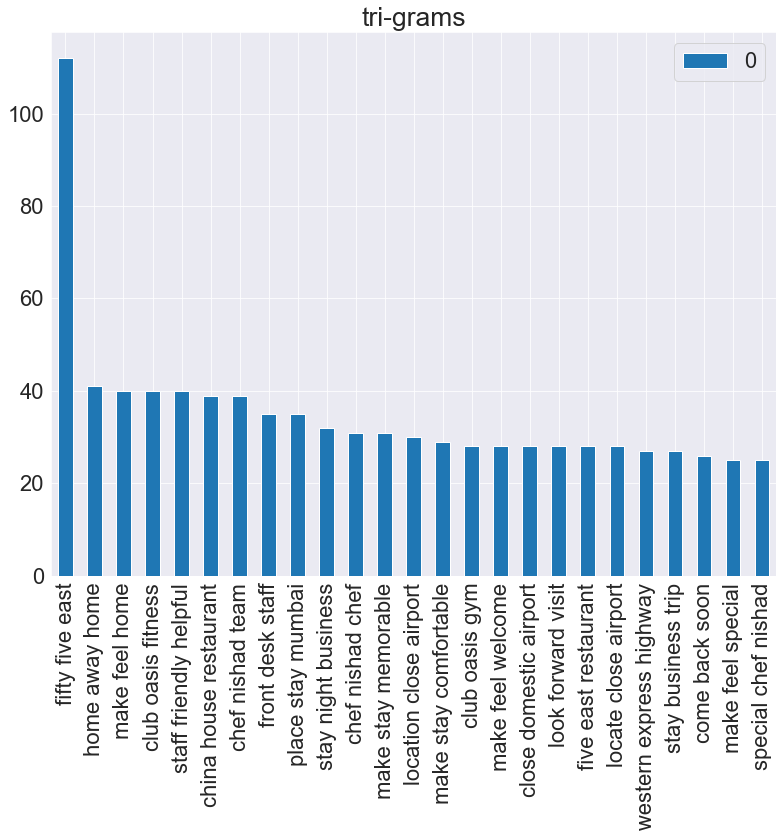

In [380]:
tri_grams.plot(kind='bar', title='tri-grams', figsize=(13, 10))

#### Term Frequency with TFIDF

In [381]:
# Converting text into vectors by TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf2 = TfidfVectorizer(norm="l2",analyzer='word', stop_words=stop_words_keywords,ngram_range=(1,1))
tfidf2_x = tfidf2.fit_transform(corpus)
most_freq_terms = pd.DataFrame(tfidf2_x.sum(axis=0),
                               columns=tfidf2.get_feature_names()).T.sort_values(
                                   0, ascending=False).head(25)


<AxesSubplot:title={'center':'most frequent terms & their frequency'}>

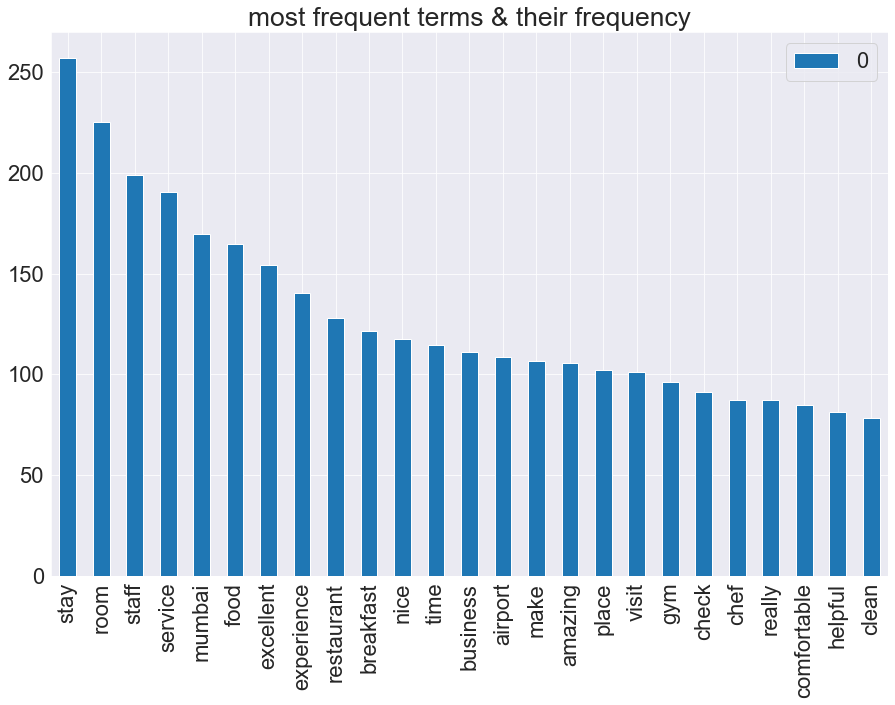

In [382]:
most_freq_terms.plot(kind='bar',
                     title='most frequent terms & their frequency',
                     figsize=(15, 10))

In [383]:
# Now we can check for frequent bi-grams:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf2 = TfidfVectorizer(norm="l2",
                         analyzer='word',
                         stop_words=stop_words_keywords,
                         ngram_range=(2, 2))
tfidf2_x = tfidf2.fit_transform(corpus)
most_freq_terms = pd.DataFrame(
    tfidf2_x.sum(axis=0),
    columns=tfidf2.get_feature_names()).T.sort_values(0,
                                                      ascending=False).head(25)

<AxesSubplot:title={'center':'Bi-Gram'}>

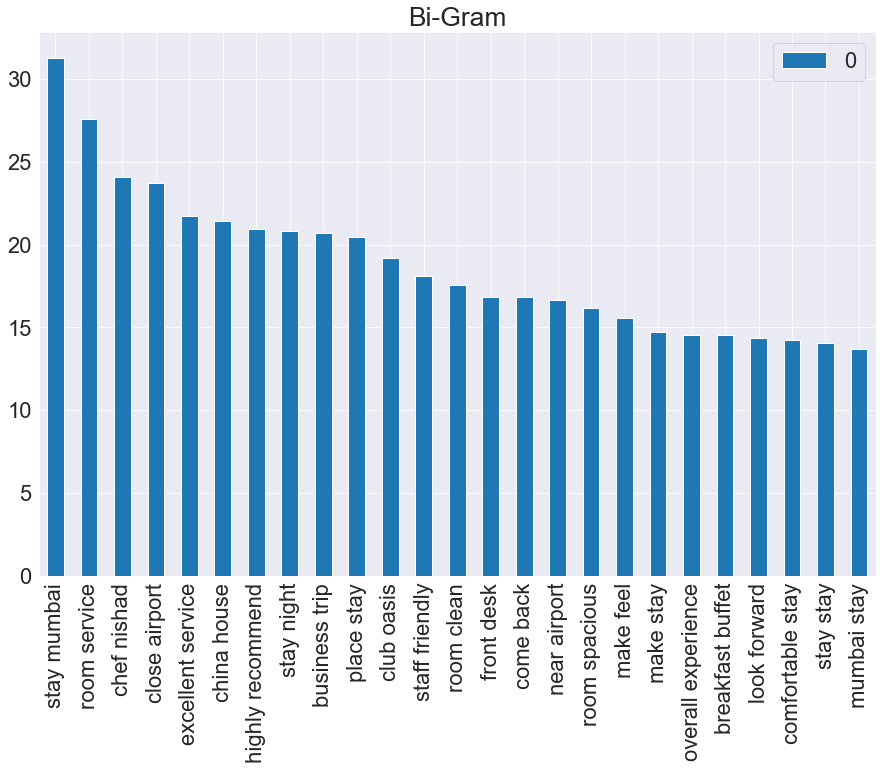

In [384]:
plt.rcParams.update({'font.size': 22})
most_freq_terms.plot(kind='bar', title='Bi-Gram', figsize=(15, 10))

In [385]:
# Now we can check for frequent tri-grams:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf2 = TfidfVectorizer(norm="l2",
                         analyzer='word',
                         stop_words=stop_words_keywords,
                         ngram_range=(3, 3))
tfidf2_x = tfidf2.fit_transform(corpus)
most_freq_terms = pd.DataFrame(
    tfidf2_x.sum(axis=0),
    columns=tfidf2.get_feature_names()).T.sort_values(0,
                                                      ascending=False).head(25)

<AxesSubplot:title={'center':'Tri-Gram'}>

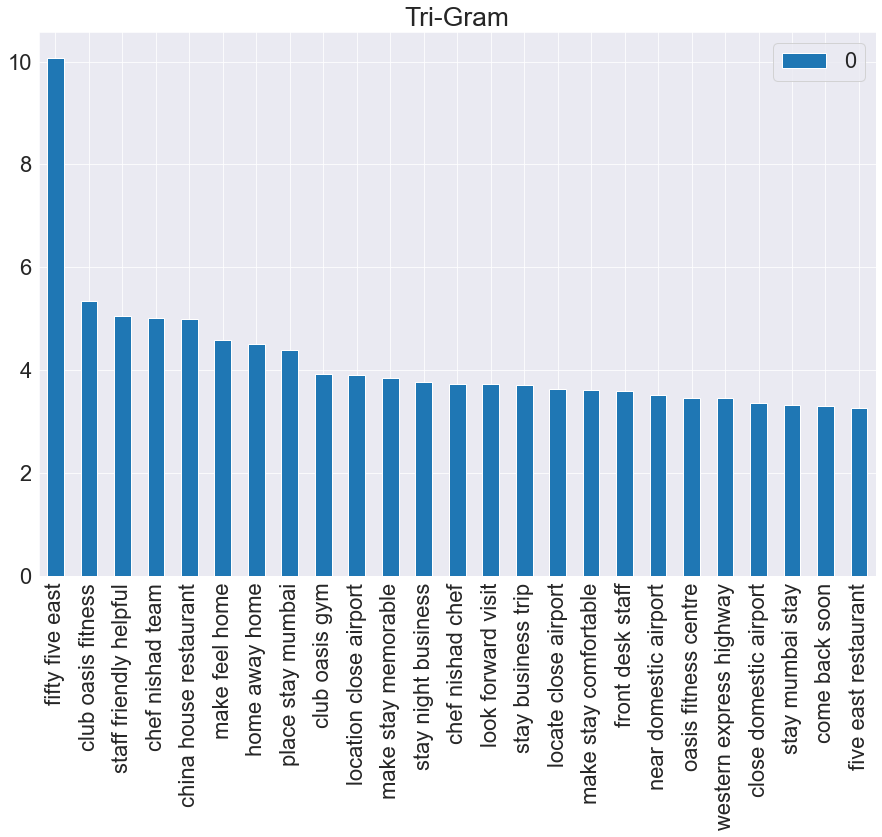

In [386]:
plt.rcParams.update({'font.size': 22})
most_freq_terms.plot(kind='bar', title='Tri-Gram', figsize=(15, 10))

### Important Attribute Extraction from the Reviews

##### CountVectorizer

In [1]:
cv2 = CountVectorizer(stop_words=stop_words_keywords,ngram_range=(1,2))
cv2_x = cv2.fit_transform(corpus)
tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
tfidf_transformer.fit(cv2_x)

# get feature names
feature_names = cv2.get_feature_names()

# fetch document for which keywords needs to be extracted
doc = corpus[532]

# generate tf-idf for the given document
tf_idf_vector = tfidf_transformer.transform(cv2.transform([doc]))

NameError: name 'CountVectorizer' is not defined

In [403]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,10)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
superb place superb lovely atmosphere nice room nice food breakfast special thank mr angel dsouza sir take care everything since small kid along truely place visit

Keywords:
truely place 0.207
superb place 0.207
kid along 0.207
dsouza sir 0.207
along truely 0.207
superb 0.2
superb lovely 0.197
special angel 0.197
small kid 0.197
sir care 0.197


#### TFIDG

In [404]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf2 = TfidfVectorizer(norm="l2",analyzer='word', stop_words=stop_words_keywords,ngram_range=(1,2))
tfidf2_x = tfidf2.fit_transform(corpus)
tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
tfidf_transformer.fit(tfidf2_x)

# get feature names
feature_names = tfidf2.get_feature_names()

# fetch document for which keywords needs to be extracted
doc = corpus[532]

# generate tf-idf for the given document
tf_idf_vector = tfidf_transformer.transform(tfidf2.transform([doc]))

In [406]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,10)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
superb place superb lovely atmosphere nice room nice food breakfast special thank mr angel dsouza sir take care everything since small kid along truely place visit

Keywords:
truely place 0.243
superb place 0.243
kid along 0.243
dsouza sir 0.243
along truely 0.243
superb lovely 0.221
special angel 0.221
small kid 0.221
sir care 0.221
place superb 0.221


### X and Y Variable

In [407]:
# Creation of X and Y variable
X = df['Cleaned_Review']
X = np.array(X).reshape(-1, 1)
y = df['Affin_sentiment']

In [408]:
# chekcing the shape of the variable
print(X.shape, y.shape)

(5000, 1) (5000,)


### Handling imbalanced data 
#### We will have to handling the imbalanced data set by using SMOTEN Technique

<AxesSubplot:xlabel='Affin_sentiment', ylabel='count'>

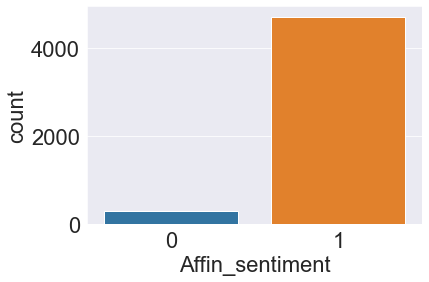

In [409]:
# visualization of the imbalanced Y variable
sns.countplot(y)

In [410]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, SMOTEN, SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [411]:
# the minority class will over sampled by 80%
stregegy = 0.8

# initializing of SMOTEN Sampling
over = SMOTEN(sampling_strategy=stregegy, random_state=7)

In [412]:
# Over Samplled X and Y variable 
X_over, y_over = over.fit_resample(X, y)

#X_under, Y_under = over.fit_resample(X_over, Y_over)


<AxesSubplot:xlabel='Affin_sentiment', ylabel='count'>

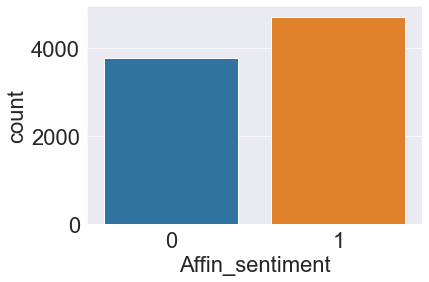

In [413]:
# visualization of the imbalanced Y variable
sns.countplot(y_over)

In [414]:
# Note Sampling have created Suplicated records in the minority class
pd.DataFrame(X_over).duplicated().value_counts()

False    5000
True     3476
dtype: int64

### Split the Data into Train and Test 

In [415]:
from sklearn.model_selection import train_test_split

In [416]:
X_train,X_test,y_train,y_test=train_test_split(X_over, y_over,random_state=7,test_size=0.20)

In [417]:
print("X_train = {}".format(X_train.shape))
print("X_test = {}".format(X_test.shape))
print("y_train = {}".format(y_train.shape))
print("y_test = {}".format(y_test.shape))

X_train = (6780, 1)
X_test = (1696, 1)
y_train = (6780,)
y_test = (1696,)


### TFIDF 

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [419]:
tfidf = TfidfVectorizer(max_features=10000,
                       ngram_range=(1,3))

In [420]:
# [' '.join (item) for item in X_train] is taken since the X_train was in numpy.ndarray format

# TFIDF for X-train
X_train_tfidf = pd.DataFrame(
    tfidf.fit_transform([' '.join(item) for item in X_train]).toarray())

# TFIDF for X-test
X_test_tfidf = pd.DataFrame(
    tfidf.fit_transform([' '.join(item) for item in X_test]).toarray())

In [421]:
X_test_tfidf

0         1         2         3         4         5         6     \
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
13    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
14    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
15    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
16    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
17    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
18    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
20    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
22    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
23    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
24    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
25    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
26    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
27    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
28    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
29    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
30    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
31    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
32    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
33    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
34    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
35    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
36    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
37    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
38    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
40    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
41    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
42    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
43    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
44    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
45    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
46    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
47    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
48    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
49    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
50    0.000000  0.000000  0.0000

In [422]:
print(X_test_tfidf.shape)
print(X_train_tfidf.shape)

(1696, 10000)
(6780, 10000)


### PCA

In [423]:
from sklearn.decomposition import PCA

In [426]:
pca = PCA(n_components=1000)
pca_X_train = pca.fit_transform(X_train_tfidf)
pca_X_train

array([[-4.18368979e-01,  6.63186476e-02, -1.70252518e-01, ...,
         6.22594002e-03,  2.85932127e-02,  1.01370429e-02],
       [-4.01626594e-01, -3.28330983e-02,  8.65486981e-02, ...,
         5.84615403e-02, -3.24343084e-02, -1.63087521e-02],
       [ 5.86434719e-01,  6.22168582e-04, -9.19826331e-05, ...,
        -2.68878195e-06,  2.41111391e-07, -5.84321482e-06],
       ...,
       [-4.09506915e-01,  6.18835528e-02,  1.41416107e-01, ...,
        -1.92534731e-03, -4.24281823e-03,  7.71838151e-03],
       [ 5.86434719e-01,  6.22168582e-04, -9.19826331e-05, ...,
        -2.68878195e-06,  2.41111391e-07, -5.84321482e-06],
       [-4.30564963e-01,  1.38621440e-01, -9.09254495e-03, ...,
        -5.25085173e-03, -2.54144545e-02,  1.35357195e-02]])

In [427]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([2.96301845e-01, 5.98393482e-03, 4.69809516e-03, 4.37210978e-03,
       3.91944061e-03, 3.01899844e-03, 2.86501344e-03, 2.40495921e-03,
       2.35815897e-03, 2.24196733e-03, 2.12060886e-03, 1.98296698e-03,
       1.97475703e-03, 1.91809054e-03, 1.84380403e-03, 1.75988604e-03,
       1.75606929e-03, 1.74963262e-03, 1.70643169e-03, 1.69325827e-03,
       1.66084859e-03, 1.62798947e-03, 1.61128804e-03, 1.55578620e-03,
       1.53081759e-03, 1.51934151e-03, 1.49199091e-03, 1.46826730e-03,
       1.45637653e-03, 1.41879623e-03, 1.40261268e-03, 1.37880642e-03,
       1.35151544e-03, 1.33941597e-03, 1.31342303e-03, 1.30279674e-03,
       1.29178381e-03, 1.27302651e-03, 1.24373441e-03, 1.24109854e-03,
       1.22055681e-03, 1.21021035e-03, 1.19765258e-03, 1.18573827e-03,
       1.18337696e-03, 1.17893875e-03, 1.16766381e-03, 1.15334652e-03,
       1.13587619e-03, 1.12825557e-03, 1.11990866e-03, 1.10427181e-03,
       1.10368298e-03, 1.09300795e-03, 1.08865908e-03, 1.07618887e-03,
      

In [428]:
# Cumulative variance
var1 = np.cumsum(np.round(var, decimals=4) * 100)
pd.DataFrame(var1).tail(10)

0
990  75.53
991  75.55
992  75.57
993  75.59
994  75.61
995  75.63
996  75.65
997  75.67
998  75.69
999  75.71

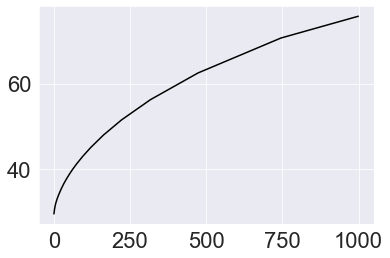

In [429]:
# Variance plot for PCA components obtained
# As we increase the number of feature the chnage in variance is norminal as the fequcency of the unique words decreases.
plt.plot(var1, color="black")

In [430]:
pca = PCA(n_components=1000)
pca_X_test = pca.fit_transform(X_test_tfidf)
pca_X_test

array([[ 5.89852045e-01,  4.93724462e-04, -1.88582316e-04, ...,
        -1.96578817e-06, -3.04313459e-06,  2.08449946e-06],
       [ 5.89852045e-01,  4.93724462e-04, -1.88582316e-04, ...,
        -1.96578817e-06, -3.04313459e-06,  2.08449946e-06],
       [-4.06171651e-01, -1.00424836e-01, -1.26509402e-02, ...,
        -2.18388608e-02, -2.00106349e-02, -5.38889613e-03],
       ...,
       [-4.06104357e-01, -5.78501959e-02,  6.63473232e-03, ...,
         1.08798224e-02,  1.49778837e-02,  3.13169778e-03],
       [-4.26554962e-01,  2.53874043e-02,  5.42781291e-02, ...,
        -1.58715886e-02, -5.55777969e-04,  4.68159750e-03],
       [-4.20321673e-01, -1.00480387e-01, -1.28800063e-02, ...,
         1.56802619e-02, -1.92997169e-02,  1.48485711e-02]])

In [431]:
var = pca.explained_variance_ratio_
var

array([2.94364209e-01, 5.99158689e-03, 5.00604948e-03, 4.52542002e-03,
       4.27534033e-03, 3.77621536e-03, 3.24451520e-03, 3.20527750e-03,
       2.78354572e-03, 2.65041458e-03, 2.61149639e-03, 2.55759410e-03,
       2.49393693e-03, 2.43719651e-03, 2.30432131e-03, 2.28290497e-03,
       2.24040771e-03, 2.21137110e-03, 2.17116460e-03, 2.14263095e-03,
       2.08681927e-03, 2.08182198e-03, 2.05103814e-03, 2.03178098e-03,
       2.01191989e-03, 1.96898263e-03, 1.95616873e-03, 1.93205456e-03,
       1.90257182e-03, 1.89867097e-03, 1.87175970e-03, 1.84159278e-03,
       1.83460313e-03, 1.82286831e-03, 1.81027107e-03, 1.80027039e-03,
       1.78818592e-03, 1.76401081e-03, 1.75700502e-03, 1.72685618e-03,
       1.72130035e-03, 1.71593056e-03, 1.70223399e-03, 1.69019014e-03,
       1.68256493e-03, 1.66647815e-03, 1.66264578e-03, 1.64074323e-03,
       1.62694634e-03, 1.61656140e-03, 1.61061786e-03, 1.59698338e-03,
       1.58850776e-03, 1.57276404e-03, 1.56544885e-03, 1.54923546e-03,
      

In [432]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
pd.DataFrame (var1).tail(10)

0
990  99.74
991  99.76
992  99.78
993  99.80
994  99.82
995  99.84
996  99.86
997  99.88
998  99.90
999  99.92

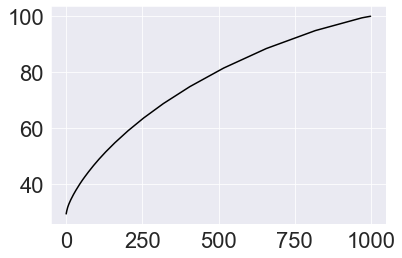

In [433]:
# Variance plot for PCA components obtained 
# for test data we are getting 99.88% data
plt.plot(var1,color="black")

### Model Building

In [435]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.model_selection import KFold

In [438]:
# custom Fuction to run the model with confusion matrix + Train and test accuracy + F1score
def model_metric(X_train, X_test, y_train, y_test, model, name):

    # predicted for X_train and X_test
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)

    # Accuracy
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)

    # F1score
    f1_score = metrics.f1_score(y_train, predict_train)

    print('Accuracy for Train set {}'.format(accuracy_train))
    print('Accuracy for Test set {}'.format(accuracy_test))
    print('Fi Score {}'.format(f1_score))

    plot_confusion_matrix(estimator=model,
                          X=X_test,
                          y_true=y_test,
                          cmap='Blues')
    plt.grid(False)
    plt.title('{} - Confusion Matrix on Test set'.format(name))

#### Logistic Regression with 10k feature in TFID

In [449]:
# Grid Creation
Grid = dict()
Grid['C'] = (0.001, 0.01, 0.1, 0.18, 0.2)
Grid['penalty'] = ("l1", "l2", "elasticnet")

# K-fold
cv = KFold(n_splits=5, shuffle=True, random_state=7)

# Model
model = LogisticRegression()

# Setting Grid search Cv
search = GridSearchCV(model, Grid, cv=cv)

# Fitting the Cv to train and test
search.fit(X_train_tfidf, y_train)

print('Best Param - {}'.format(search.best_params_))
print('Best Score - {}'.format(search.best_score_))

Best Param - {'C': 0.001, 'penalty': 'l2'}
Best Score - 0.9654867256637167


In [ ]:
Accuracy for Train set 0.9654867256637168
Accuracy for Test set 0.5595518867924528

Accuracy for Train set 0.9800884955752213
Accuracy for Test set 0.5595518867924528
Fi Score 0.9823644676681907


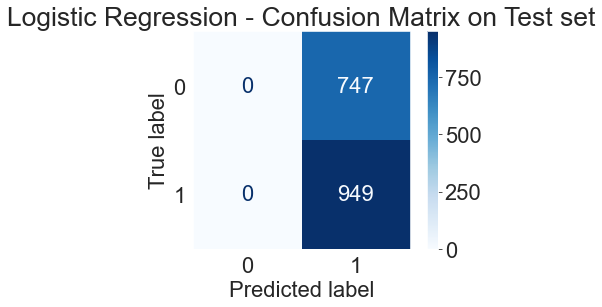

In [450]:
# model is clearly over fitting
from sklearn.model_selection import cross_val_score
name = 'Logistic Regression'
model_lr = LogisticRegression(C=1.8, penalty='l2', random_state=7)
model_lr.fit(X_train_tfidf, y_train)


model_metric(X_train_tfidf, X_test_tfidf, y_train, y_test, model_lr,
                'Logistic Regression')

#### Logistic Regression with PCA data

Accuracy for Train set 0.9768436578171091
Accuracy for Test set 0.9669811320754716
Fi Score 0.9795493031131953


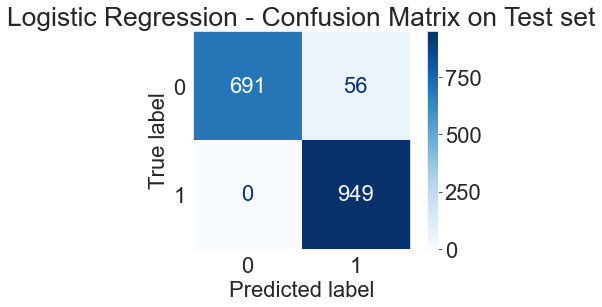

In [451]:
name = 'Logistic Regression'
model_lr = LogisticRegression(C=1.8, penalty='l2', random_state=7)
model_lr.fit(pca_X_train, y_train)

model_metric(pca_X_train, pca_X_test, y_train, y_test, model_lr,
             'Logistic Regression')

#### KNN with 10k feature in TFID

Accuracy for Train set 0.9753687315634219
Accuracy for Test set 0.5548349056603774
Fi Score 0.978167080664139


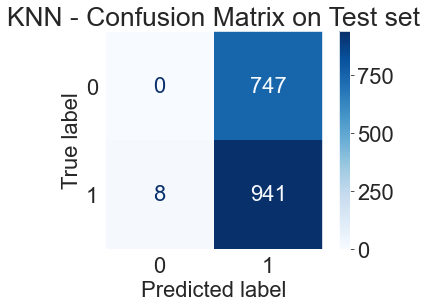

In [453]:
from sklearn.neighbors import KNeighborsClassifier

model13_1 = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
model13_1.fit(X_train_tfidf, y_train)
model_metric(X_train_tfidf, X_test_tfidf, y_train, y_test, model13_1, 'KNN')

#### KNN with PCA data

Accuracy for Train set 0.9765486725663717
Accuracy for Test set 0.9669811320754716
Fi Score 0.979142070051161


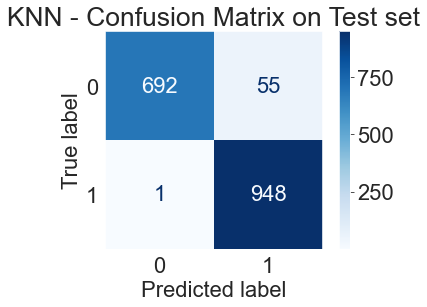

In [458]:
model13_1 = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
model13_1.fit(pca_X_train, y_train)
model_metric(pca_X_train, pca_X_test, y_train, y_test, model13_1, 'KNN')

#### Random Forest with 10k Feature in TFDIF 

In [488]:
# Random forest algorithm for Classification
from sklearn.ensemble import RandomForestClassifier

# Grid creation
Grid = dict()
Grid['n_estimators'] = (10, 100, 1000)
Grid['max_depth'] = (3, 7, 9, 15, 24)
Grid['max_features'] = ("auto", "sqrt", "log2")

# K-fold
cv = KFold(n_splits=5, shuffle=True, random_state=7)

# define models
model = RandomForestClassifier()

# Setting Grid Search CV
search = GridSearchCV(model, Grid, cv=cv)

# Fitting tthe cv to train and test
search.fit(X_train_tfidf, y_train)

print('Best Param - {}'.format(search.best_params_))
print('Best Score - {}'.format(search.best_score_))

KeyboardInterrupt: 

Accuracy for Train set 0.9998525073746313
Accuracy for Test set 0.5595518867924528
Fi Score 0.9998670389575854


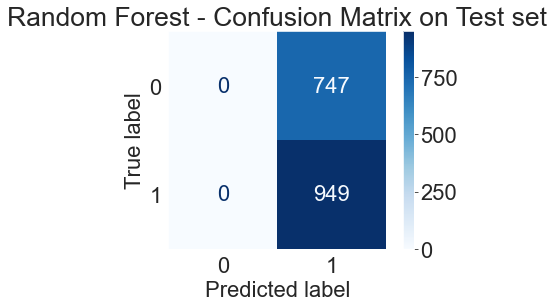

In [463]:
# Random forest algorithm for Classification
from sklearn.ensemble import RandomForestClassifier

# define models and parameters
num_trees = 60
model = RandomForestClassifier(n_estimators=num_trees)
model.fit(X_train_tfidf, y_train)

#Results
model_metric(X_train_tfidf,X_test_tfidf,y_train,y_test,model, 'Random Forest')

#### Random Forest with PCA data

Accuracy for Train set 0.9976401179941002
Accuracy for Test set 0.9652122641509434
Fi Score 0.9978768577494692


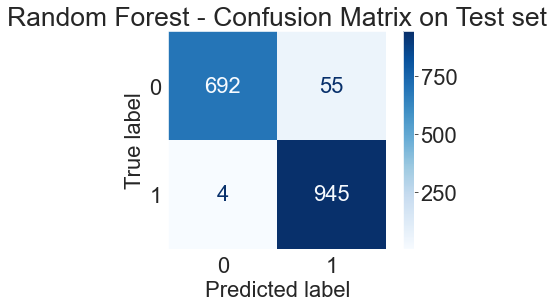

In [482]:
# Random forest algorithm for Classification
from sklearn.ensemble import RandomForestClassifier

# define models and parameters
num_trees = 15

model = RandomForestClassifier(n_estimators=num_trees, random_state=7)
model.fit(pca_X_train, y_train)

# Results
model_metric(pca_X_train, pca_X_test, y_train, y_test, model, 'Random Forest')

#### SVM with 10k Feature in TFIDF

In [479]:
from sklearn.svm import SVC

In [484]:
# Grid Creation
Grid = dict()
Grid['C'] = np.array(np.arange(1, 6))
Grid['kernel'] = ('linear', 'rbf', 'sigmoid')

# K-fold
cv = KFold(n_splits=5, shuffle=True, random_state=7)

# Model
model = SVC()

# Setting Grid search CV
search = GridSearchCV(model, Grid, cv=cv)

# Fitting the Cv to train and test
search.fit(X_train_tfidf, y_train)

print('Best Param - {}'.format(search.best_params_))
print('Best Score - {}'.format(search.best_score_))

KeyboardInterrupt: 

In [ ]:
model_svc = SVC(C=4, kernel='rbf')
model_svc.fit(x_train, y_train)

model_metric(X_train_tfidf, X_test_tfidf, x_test, y_test, model_svc, "SVM")

#### SVM with PCA

In [ ]:
model_svc = SVC(C=4, kernel='rbf')
model_svc.fit(x_train, y_train)

model_metric(X_train_tfidf, X_test_tfidf, x_test, y_test, model_svc, "SVM")

### RNN

In [180]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from keras.wrappers.scikit_learn import KerasClassifier

from keras.preprocessing.text import Tokenizer

In [ ]:
new_X_train=tf.texts_to_matrix(X_train, mode='binary')

In [156]:
# text data taken
new_X_train=[' '.join(item) for item in X_train]
new_X_test =[' '.join(item) for item in X_test]

In [ ]:
tk = Tokenizer(num_words=9500)
tk.fit_on_texts(new_X_train)

In [ ]:
X_train_oh = tk.texts_to_matrix(new_X_train, mode='binary')
X_test_oh = tk.texts_to_matrix(new_X_test, mode='binary')

In [ ]:
X_test_oh.shape

In [ ]:
X_train.shape

In [ ]:
X_train[0]

In [157]:
vocab_size=9995
encoded_reviews_X_train=[one_hot(d,vocab_size) for d in new_X_train]
encoded_reviews_X_test=[one_hot(d,vocab_size) for d in new_X_test]

In [158]:
len(encoded_reviews_X_test[1])

56

In [159]:
np.argmax(new_X_train)

1391

In [160]:
cc=[len(item.split().va) for item in new_X_train]
sum (cc)

AttributeError: 'list' object has no attribute 'va'

In [161]:
len(new_X_train[1391])

312

In [162]:
pd.DataFrame(encoded_reviews_X_train) # threhold of 96 columns in rnn 

0     1     2     3     4     5     6     7     8       9   ...  86  \
0      839  7938  1357  7448  4852  5069  8687  4223  5069    83.0  ... NaN   
1     4413  2937  4016  4559  7575  4252  5964  6119  3010  8768.0  ... NaN   
2     3380  1072  7295  9157  8065  5408  8019  5588  5069  7553.0  ... NaN   
3     6642  8762  1123  2344  8408  1716  6327  9890  4447  8039.0  ... NaN   
4     5069  4016  4413  7142  8408  5069  2445   475   839   839.0  ... NaN   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...     ...  ...  ..   
6775  4223  8869  6962   121   982  3091  6572  2155  6924  7721.0  ... NaN   
6776  8672  7295  9610  4220  6808  4413  6809  1691  5854  9214.0  ... NaN   
6777  4223  5113  5069  7084  8155  4223  7938  7553  4016  4413.0  ... NaN   
6778  3380  1072  7295  9157  8065  5408  8019  5588  5069  7553.0  ... NaN   
6779  4231  6512  1691   839  4033  7496   357   913  3047  4050.0  ... NaN   

      87  88  89  90  91  92  93  94  95  
0    NaN NaN NaN NaN NaN NaN NaN NaN NaN  
1    NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2    NaN NaN NaN NaN NaN NaN NaN NaN NaN  
3    NaN NaN NaN NaN NaN NaN NaN NaN NaN  
4    NaN NaN NaN NaN NaN NaN NaN NaN NaN  
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  
6775 NaN NaN NaN NaN NaN NaN NaN NaN NaN  
6776 NaN NaN NaN NaN NaN NaN NaN NaN NaN  
6777 NaN NaN NaN NaN NaN NaN NaN NaN NaN  
6778 NaN NaN NaN NaN NaN NaN NaN NaN NaN  
6779 NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[6780 rows x 96 columns]

In [163]:
max_length = 96
padded_reviews_X_train = pad_sequences(encoded_reviews_X_train, maxlen=max_length, padding='post')
print(padded_reviews_X_train[0])

padded_reviews_X_test = pad_sequences(encoded_reviews_X_test, maxlen=max_length, padding='post')
print(padded_reviews_X_test[0])

[ 839 7938 1357 7448 4852 5069 8687 4223 5069   83 8266 4592 1030 6117
 7051 7986 3785 1716 4223 3839  839 9159 1123 4223 1716  121 2155 5069
 8672 6396    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
[3380 1072 7295 9157 8065 5408 8019 5588 5069 7553 2038 3239 4404 5665
 8635 5408  730 5408 8051 7491 9766  617 2782 4398 5408 8880   98 9180
  778 6396 5408 8019 7076 1916 3910 6396  317 2265  317 3283 5005 9106
 7975 3512 6340 5571 1691 5867 6534 8391 9591 5069 7553 2389 7657 7295
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


In [172]:
len(padded_reviews_X_test[10])

96

In [166]:
embeded_vector_size = len(padded_reviews_X_train[0]) # which is column size 96

model = Sequential()
model.add(Embedding(vocab_size, embeded_vector_size, input_length=max_length,name="embedding"))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [167]:
sentiment_y_train = np.array(y_train)
sentiment_y_test =np.array(y_test)
sentiment_y_train

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [168]:
X_train_pad = padded_reviews_X_train
X_test_pad = padded_reviews_X_test
pad_y_train = sentiment_y_train
pad_y_test = sentiment_y_test

In [169]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 96, 96)            959520    
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 9217      
Total params: 968,737
Trainable params: 968,737
Non-trainable params: 0
_________________________________________________________________
None


In [220]:
# training the model on train data 
history = model.fit(X_train_pad,pad_y_train, validation_split=0.33, batch_size=2, epochs=50, verbose=0)

In [207]:
# evaluate the model on test data 
loss, accuracy = model.evaluate(X_test_pad, pad_y_test)
accuracy

53/53 [==============================] - 0s 2ms/step - loss: 0.1519 - accuracy: 0.9752


0.9752358198165894

In [214]:
model.predict(X_test_pad)

array([[1.1183735e-19],
       [1.1183735e-19],
       [1.0000000e+00],
       ...,
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)

In [212]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

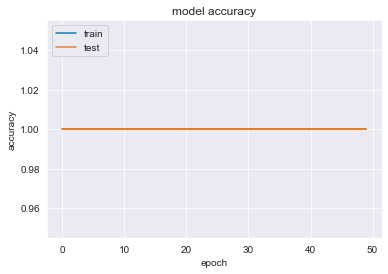

In [221]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

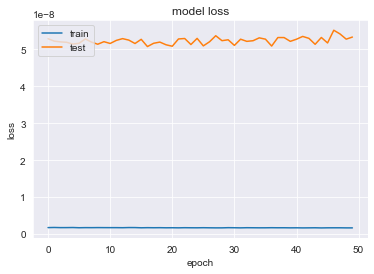

In [222]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Word2vec

In [ ]:
import gensim 
from gensim.models import Word2Vec, KeyedVectors
from gensim.models.phrases import Phrases, Phraser

In [ ]:
size = 1000
window = 3
min_count = 1
workers = 3
sg = 1

In [ ]:
# Train the Word2Vec Model
w2v_model = Word2Vec(corpus, min_count = min_count, vector_size= size, workers = workers, window = window, sg = sg)

In [ ]:
# Model saved hence not required to perform it again 
w2v_model.save("word2vec.model")

In [ ]:
# Load the model from the model file
sg_w2v_model = Word2Vec.load("word2vec.model")

In [ ]:
# Store the vectors for train data in following file
   
    for index, row in corpus.iterrows():
        model_vector = (np.mean([sg_w2v_model[token] for token in corpus], axis=0)).tolist()
        if index == 0:
            header = ",".join(str(ele) for ele in range(1000))
            word2vec_file.write(header)
            word2vec_file.write("\n")
        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(1000)])
        word2vec_file.write(line1)
        word2vec_file.write('\n')

In [ ]:
print(np.mean([sg_w2v_model.wv.get_vector(token) for token in corpus[0]], axis=0))


In [ ]:
line1=[]
model_vector=np.mean([sg_w2v_model.wv.get_vector(token) for token in corpus[0]], axis=0)
if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )


In [ ]:
[(vector_element) for vector_element in model_vector]

In [ ]:
KeyedVectors()

In [ ]:
model = Word2Vec(corpus,
                 vector_size=100,
                 min_count=2,
                sg=1)

In [ ]:
model.min_count

In [ ]:
model['hotel']

In [ ]:
help(Word2Vec)

In [ ]:
pd.DataFrame(model.syn1neg)

In [ ]:
words = model.wv.get_vecattr('hotel')

In [ ]:
model.wv(corpus)

In [ ]:
for word in corpus:
    vector=model[word]

In [ ]:
model.wv.most_similar('chain')

In [ ]:
words = model.trainables

In [ ]:
 model.wv.get_vector('hotel')

In [ ]:
words

In [ ]:
phrases = Phrases(sentences=corpus,
                  min_count=5,
                 progress_per=10000)

In [ ]:
bigram = Phraser(phrases)

In [ ]:
sentences = bigram[corpus]

In [ ]:
sentences

In [ ]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in corpus:
        word_freq[i] += 1
len(word_freq)

In [ ]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20)

In [ ]:
model.build_vocab(sentences, progress_per=10000)

In [ ]:
word= list(model.wv.vocab)

In [ ]:
word